## Importing Libraries

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Optional: ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


# Part 1: Load and Explore the data

## Step 1: Loading diabetes dataset

In [334]:
# Step 1: Load diabetes dataset
diabetes = datasets.load_diabetes(as_frame=True)

X = diabetes.data           # stores features (10 numerical predictors)
y = diabetes.target         # stores Target variable: disease progression

# Convert to DataFrame for convenience
df = X.copy()
df['target'] = y
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Step 2: Framing the problmem
1. we are going to create a model that predicts Target(Disease progression) one year after baseline using the other 10 patient features
2. Dependent Varaible - target
3. Independent variable - 10 features i.e; BMI, blood preasure, age, etc.

## Step 3: Exploratory Data Analysis (EDA)

In [335]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


### Creating histograms for all numerical columns inorder to analyze the data distribution(normal, skewed, or has outliers)

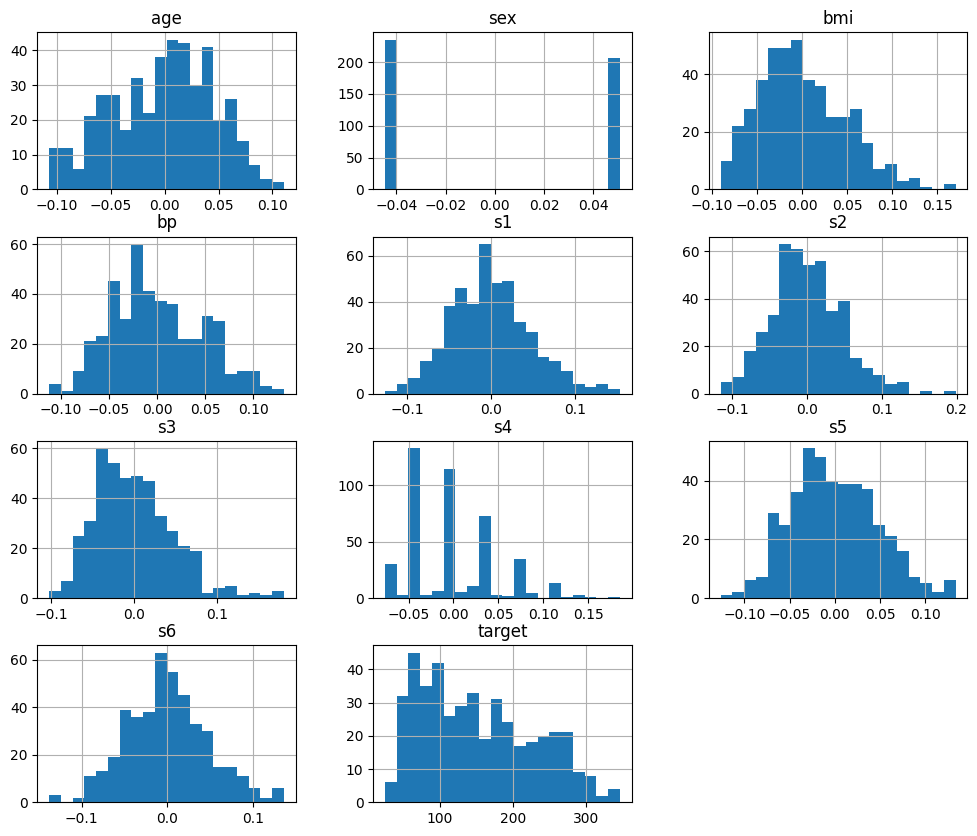

In [336]:
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(12,10))  # 
plt.show()


#### Insight
The diabetes dataset shows that Age, BMI, BP, and the target are roughly symmetric and approximately bell-shaped, suggesting linear models may work reasonably well on these features

Sex, s1, and s4 are categorical-like or highly skewed, while s3, s5, and s6 are right-skewed and may benefit from scaling or transformation.

The target variable is also right-skewed, indicating most patients have lower disease progression values


### Plotting correlation matrix to show how stron each feature(category) correlates with the target column

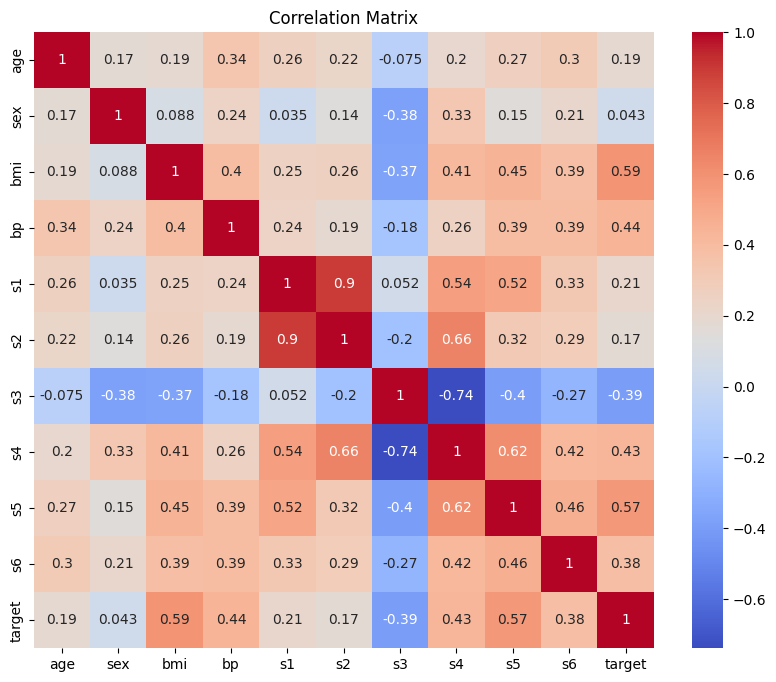

In [337]:
plt.figure(figsize=(10,8))   # sets the size of the figure
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')    # computing pearson correlation column between all pairs of columns and creates a color coded matirx
plt.title("Correlation Matrix")   # title of the heatmap
plt.show()


#### Insight
BMI and S5 show the strongest positive correlations with disease progression, making them key predictors in the dataset

S1 and S2 are highly correlated with each other.

S3 stands out with consistent negative correlations

### Scatter plot of BMI vs Target(Disease progression)

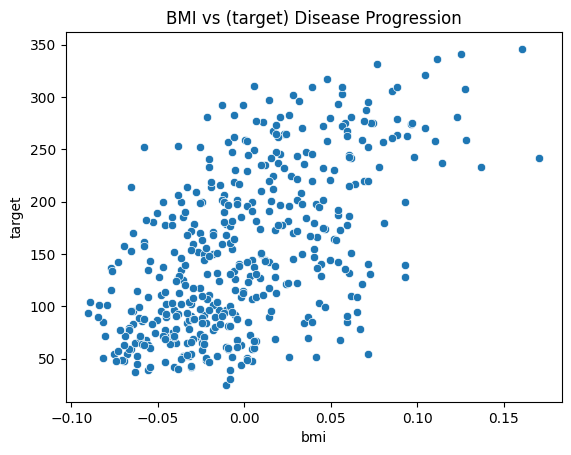

In [338]:
sns.scatterplot(x='bmi', y='target', data=df)   # scatterplotting bmi(x-axis) against target
plt.title("BMI vs (target) Disease Progression")  # title of the scatterplot
plt.show()

#### Insight
This scatterplot shows a clear positive trend between BMI and disease progression, reinforcing the strong correlation observed earlier. 

As BMI increases, the target variable tends to rise, suggesting that higher body mass may be associated with more severe outcomes.


## Step 4: Data Cleaning

In [339]:
print(df.isna().sum())       # Checking a d displaying if there is any missing values in any columns
print(df.duplicated().sum()) # Checking if there is any duplicates in any columns

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64
0


#### Explanation: 
The diabletes is already clean and ready to be used hence no further cleaning is needed

## Step 5: Spiitting the dataset into Training dataset, Validation dataset and Test dataset

In [340]:
# 75% train, 10% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.75, random_state=42)  # splitting the dataset into x_train, y_train(75%) and x_temp, y_temp(25%)
val_size = 0.10 / 0.25  # proportion of temp set for validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.60, random_state=42) # furhter splitting the test data into 10% for validation and 15% for testing

print(f"Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")  # Ddiplaying the number of samples in each

Train: 331, Val: 44, Test: 67


# Part 2: Creating a Univariate Polynomial Regression model on BMI vs Target(Disease progression)

## Step 6: Training 6 models of degreees 0-5 using Univariate polynomial regression on the BMI vs Target(Disease progression)

In [341]:
degrees = range(0, 6)
results = []

for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=True)
    X_train_poly = poly.fit_transform(X_train[['bmi']])
    X_val_poly = poly.transform(X_val[['bmi']])

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    r2_val = r2_score(y_val, y_val_pred)

## Step 7:  Comparing the 6 models

In [342]:
 # Metrics
degrees = range(0, 6)
best_r2 = -np.inf
best_degree = None
for d in degrees:    # looping through each model

    results.append({
        'Degree': d,   # storing the degree of the polynomial
        'Train R2': r2_score(y_train, y_train_pred),  # calculating R2 score on training data
        'Val R2': r2_score(y_val, y_val_pred),  # calculating R2 score on validation data
        'Train MAE': mean_absolute_error(y_train, y_train_pred),  # calculating MAE on training data
        'Val MAE': mean_absolute_error(y_val, y_val_pred),  # calculating MAE on validation data
        'Train MAPE': np.mean(np.abs((y_train - y_train_pred)/y_train))*100,  # calculating MAPE on training data
        'Val MAPE': np.mean(np.abs((y_val - y_val_pred)/y_val))*100  # calculating MAPE on validation data
    })

results_df = pd.DataFrame(results) # converting the results list into a DataFrame for better visualization
# sort using the highest validation R2 score
results_df

,Degree,Train R2,Val R2,Train MAE,Val MAE,Train MAPE,Val MAPE
0,0,0.3541,0.349881,52.059191,45.462121,48.004022,45.175275
1,1,0.3541,0.349881,52.059191,45.462121,48.004022,45.175275
2,2,0.3541,0.349881,52.059191,45.462121,48.004022,45.175275
3,3,0.3541,0.349881,52.059191,45.462121,48.004022,45.175275
4,4,0.3541,0.349881,52.059191,45.462121,48.004022,45.175275
5,5,0.3541,0.349881,52.059191,45.462121,48.004022,45.175275


## Step 8: Selecting the best Model

#### The best model is the model with the highest Validation R squared, this is because a higher validation R squared means that the models predictions are closer to the actual values hence indicating better fit

In [343]:
if r2_val > best_r2:
        best_r2 = r2_val
        best_degree = d

print(f"Best degree based on validation R2: {best_degree}")

Best degree based on validation R2: 5


## Step 9: Running the best model chosen above on the Testing data and displaying the results of R-Squared, MAPE, MAE

In [344]:
poly = PolynomialFeatures(degree=int(best_degree), include_bias=True)  # creating polynomial features with the best degree
X_train_poly = poly.fit_transform(X_train[['bmi']])  # fitting the transformation on training data
X_test_poly = poly.transform(X_test[['bmi']]) # fitting the transformation on testing data

model = LinearRegression() # creating a linear regression model
model.fit(X_train_poly, y_train) # training the model on training data
y_test_pred = model.predict(X_test_poly) # predicting the target(disease progression) on testing data

# Metrics
r2_test = r2_score(y_test, y_test_pred) # calculating R2 score on testing data
mae_test = mean_absolute_error(y_test, y_test_pred) # calculating MAE on testing data
mape_test = np.mean(np.abs((y_test - y_test_pred)/y_test))*100 # calculating MAPE on testing data

print(f"Test R2: {r2_test:.3f}, MAE: {mae_test:.3f}, MAPE: {mape_test:.2f}%")


Test R2: 0.267, MAE: 51.750, MAPE: 43.03%


## Step 10: Plotting a graph of the train, validation and Test data

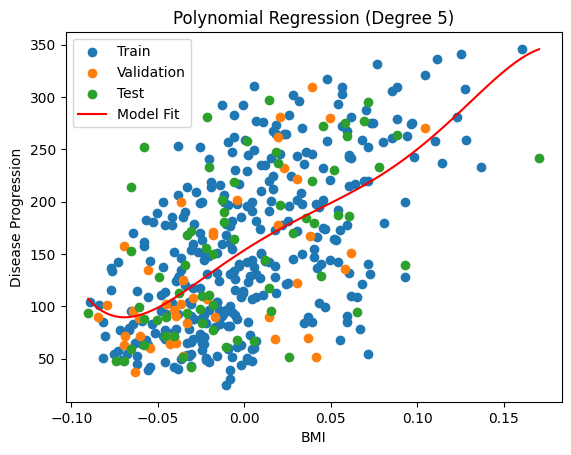

In [345]:
plt.scatter(X_train['bmi'], y_train, label='Train')
plt.scatter(X_val['bmi'], y_val, label='Validation')
plt.scatter(X_test['bmi'], y_test, label='Test')

# Smooth curve for predictions
bmi_range = np.linspace(X['bmi'].min(), X['bmi'].max(), 100).reshape(-1,1)
plt.plot(bmi_range, model.predict(poly.transform(bmi_range)), color='red', label='Model Fit')

plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.title(f"Polynomial Regression (Degree {best_degree})")
plt.show()


## Step 11: Writing down the model equation of the best model used above

In [346]:
coefs = model.coef_
intercept = model.intercept_
equation = f"y = {intercept:.2f}"
for i, c in enumerate(coefs):
    equation += f" + {c:.2f}*x^{i}" if i>0 else ""
print("Polynomial Model Equation:", equation)


Polynomial Model Equation: y = 153.65 + 1059.89*x^1 + -3824.15*x^2 + -16770.23*x^3 + 753722.52*x^4 + -2993716.57*x^5


## Step 12: Predicting the expected target (Disease progression) value for a BM1 value of my choice

In [347]:
bmi_value = 0.03
pred = model.predict(poly.transform([[bmi_value]]))
print(f"Predicted disease progression for BMI={bmi_value}: {pred[0]:.2f}")


Predicted disease progression for BMI=0.03: 182.09


## Step 13: Displaying the number of trainable parameters we fitted for each model

In [348]:
poly.get_feature_names_out(['bmi'])


array(['1', 'bmi', 'bmi^2', 'bmi^3', 'bmi^4', 'bmi^5'], dtype=object)

## Step 14: Conclusion

The degree 5 polynomial regression model, trained to predict disease progression from BMI, achieved a test R² of 0.267, MAE of 51.75, and MAPE of 43.03%. 

While the model captured complex non-linear trends in the training data, as seen in the highly curved red line in the plot, its performance on the test set was modest—explaining only about 27% of the variance. 

This suggests that the model overfits the training data and struggles to generalize to unseen samples.

The model's limitations stem from its reliance on a single feature (BMI), lack of regularization, and the assumption that disease progression follows a polynomial pattern. 

Its sensitivity to noise and exaggerated curvature in regions with sparse data further reduce its reliability. 

A lower-degree model or one incorporating additional features and regularization would likely offer better predictive stability and interpretability.

#### To investigate further, I visualized the graph of the train, validation and test with models of degree 0, 1, 2, 3, 4, 5

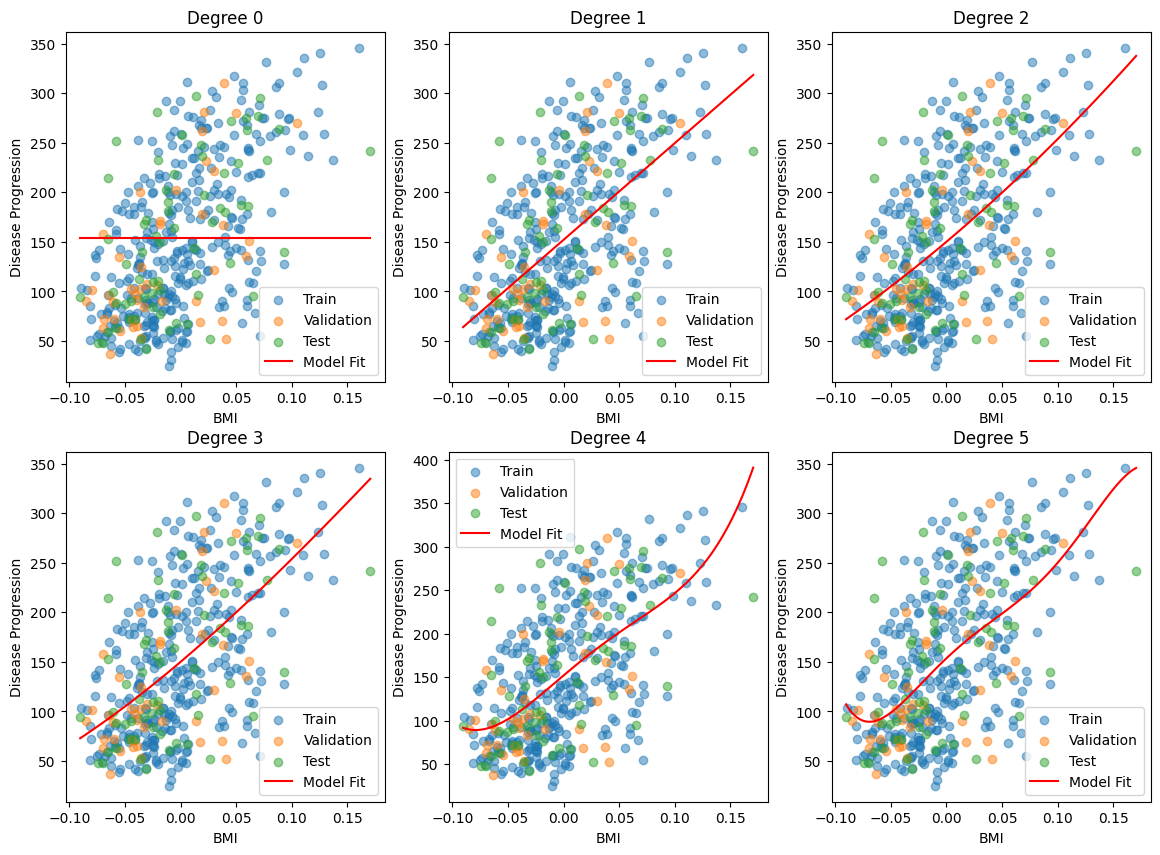

In [349]:

# defining the degree from index 1 to 5
degrees = [0, 1, 2, 3, 4, 5]
# iterating through each degree and plotting the best model for train test and validation sets
# I want the figure size to smaller so that it fit two in one row

plt.figure(figsize=(14, 10))  # setting the figure size
for i, d in enumerate(degrees, 1):  # looping through each degree with index starting from 1
    plt.subplot(2, 3, i)  # creating a subplot grid of 2 rows and 3 columns
    poly = PolynomialFeatures(degree=d, include_bias=True)  # creating polynomial features for the current degree
    X_train_poly = poly.fit_transform(X_train[['bmi']])  # fitting the transformation on training data
    X_val_poly = poly.transform(X_val[['bmi']])  # fitting the transformation on validation data
    X_test_poly = poly.transform(X_test[['bmi']])  # fitting the transformation on testing data

    model = LinearRegression()  # creating a linear regression model
    model.fit(X_train_poly, y_train)  # training the model on training data

    # Predictions
    y_train_pred = model.predict(X_train_poly)  # predicting on training data
    y_val_pred = model.predict(X_val_poly)  # predicting on validation data
    y_test_pred = model.predict(X_test_poly)  # predicting on testing data

    # Plotting
    plt.scatter(X_train['bmi'], y_train, label='Train', alpha=0.5)
    plt.scatter(X_val['bmi'], y_val, label='Validation', alpha=0.5)
    plt.scatter(X_test['bmi'], y_test, label='Test', alpha=0.5)

    bmi_range = np.linspace(X['bmi'].min(), X['bmi'].max(), 100).reshape(-1,1)
    plt.plot(bmi_range, model.predict(poly.transform(bmi_range)), color='red', label='Model Fit')

    plt.xlabel('BMI')
    plt.ylabel('Disease Progression')
    plt.title(f'Degree {d}')
    plt.legend()

The six-panel diagram highlights how increasing the polynomial degree from 0 to 5 affects model flexibility and fit. Lower-degree models underfit the data, missing key trends, while higher-degree models (especially degrees 3 to 5) offer greater adaptability, closely tracing the training data but risking overfitting.

#### Talking points from Discussion with Oluwafemi

Classification – is a supervised learning task where the goal is to assign input data to one of several predefined categories.
Use Cases: Email spam detection, image recognition
Class Imbalance - occurs when some classes are underrepresented in the training data.
Impact: Models may become biased toward majority classes, reducing recall for minority classes.
 
Predictions – Based on IV/DV?
IV (Independent Variables): Input features used to make predictions.
DV (Dependent Variable): Target label the model tries to predict.
 
Performance Metrics
Accuracy - Ratio of correct predictions to total predictions.
Limitation: Misleading in imbalanced datasets.
 
Precision/Recall
 
Precision - measures the proportion of correctly predicted positive instances out of all instances predicted as positive.
Formulae: True Positives / True Positives + False Positives
 
Recall - measures the proportion of correctly predicted positive instances out of all actual positive instances.
Formulae: True Positives / True Positives + False Negatives
 
Cross-Validation Folds
Definition: A technique to assess model generalization by splitting data into training and validation sets multiple times.
k-Fold CV: Data is split into k subsets; each fold is used once as validation while the rest serve as training.

# Part 3: Creating a Multivariate model

## Step 1: Polynomial Regression using Selected Features

#### Talking points from Discussion with Oluwafemi
Polynomial regression enhances linear models by adding powers and interactions of features, enabling them to capture nonlinear relationships. 

The polynomial degree determines how flexible or complex the model becomes—higher degrees can fit intricate patterns but may cause overfitting. 

Since polynomial expansion increases the number of features, careful feature selection is necessary to avoid amplifying noise.

#### Key terminologies
Polynomial Features: New features created by raising existing features to powers and combining them

Degree: The highest power of any feature in the polynomial expansion; determines model complexity.

Overfitting: When a model learns noise or random fluctuations in the training data, leading to poor generalization.

In [350]:
selected_features=['age', 'bmi', 'bp','s1','s2','s3','s4', 's5']  # Selected features based on EDA
X = X[selected_features]  # Selected features
y = diabetes.target         # stores Target variable: disease progression

# Displaying the first 5 rows of the selected features


X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.75, random_state=42)  # splitting the dataset into x_train, y_train(75%) and x_temp, y_temp(25%)
val_size = 0.10 / 0.25  # proportion of temp set for validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.60, random_state=42) # furhter splitting the test data into 10% for validation and 15% for testing

print(f"Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")  # Ddiplaying the number of samples in each set


Train: 331, Val: 44, Test: 67


In [351]:
# Evaluate polynomial models
for degree in [2, 3]:
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_val_pred = model.predict(X_val_poly)
    y_test_pred = model.predict(X_test_poly)

    print(f"\nPolynomial Regression (Degree {degree})")
    print("Trainable Parameters:", len(poly.get_feature_names_out(X.columns)))
    print("R² Validation:", round(r2_score(y_val, y_val_pred), 3))
    print("R² Test:", round(r2_score(y_test, y_test_pred), 3))
    print("MAE Test:", round(mean_absolute_error(y_test, y_test_pred), 2))
    print("MAPE Test (%):", round(mean_absolute_percentage_error(y_test, y_test_pred) * 100, 2))



Polynomial Regression (Degree 2)
Trainable Parameters: 45
R² Validation: 0.429
R² Test: 0.43
MAE Test: 46.2
MAPE Test (%): 37.63

Polynomial Regression (Degree 3)
Trainable Parameters: 165
R² Validation: -3.766
R² Test: -2.636
MAE Test: 92.84
MAPE Test (%): 80.58


#### Conclusion
The degree 2 polynomial regression model, built using selected features like age, BMI, and blood pressure markers, demonstrated strong generalization with a validation R² of 0.429 and test R² of 0.43, alongside moderate error rates (MAE = 46.2, MAPE = 37.63%). In contrast, the degree 3 model drastically overfit the training data, yielding negative R² scores on both validation (−3.766) and test (−2.636) sets, and much higher errors (MAPE = 80.58%). These results highlight that increasing model complexity without adequate data or regularization can severely degrade predictive performance.

## Step 2: Decsion Trees Regression using Selected Features

#### Talking points from Discussion with Oluwafemi
Decision trees work by recursively splitting data based on feature values, creating a tree-like structure of decisions that lead to predictions. 

The depth of the tree controls its complexity — shallow trees tend to generalize well, while deeper ones may overfit. 

They are easy to interpret and can handle both numerical and categorical data effectively.

#### Key terminologies
Node: A point in the tree where a decision is made based on a feature value.

Leaf: A terminal node that outputs a prediction.

Max Depth: The maximum number of splits from root to leaf; controls model complexity.

We say “decision trees” (plural) because there are many different trees you can build depending on your data, features, and settings. 

Each time you train a model, you create a new tree so we’re not talking about one fixed tree, but a whole family of trees used for decision-making

In [352]:
# Evaluate decision trees
for depth in [3,7]:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)

    y_val_pred = tree.predict(X_val)
    y_test_pred = tree.predict(X_test)

    print(f"\nDecision Tree (max_depth={depth})")
    print("R² Validation:", round(r2_score(y_val, y_val_pred), 3))
    print("R² Test:", round(r2_score(y_test, y_test_pred), 3))
    print("MAE Test:", round(mean_absolute_error(y_test, y_test_pred), 2))
    print("MAPE Test (%):", round(mean_absolute_percentage_error(y_test, y_test_pred) * 100, 2))



Decision Tree (max_depth=3)
R² Validation: 0.198
R² Test: 0.438
MAE Test: 46.12
MAPE Test (%): 40.18

Decision Tree (max_depth=7)
R² Validation: -0.012
R² Test: 0.254
MAE Test: 53.93
MAPE Test (%): 44.78


#### Conclusion
The decision tree model with max_depth=3 achieved a validation R² of 0.198 and test R² of 0.438, indicating moderate generalization and a reasonable balance between bias and variance. In contrast, increasing the depth to 7 resulted in overfitting, with a negative validation R² (−0.012) and degraded test performance (R² = 0.254, MAPE = 44.78%). These results suggest that deeper trees may overfit the training data and capture noise rather than meaningful patterns, especially when relying on a single feature like BMI.

## Step 3: k-Nearest Neighbors Regression using Selected Features

#### Talking points from Discussion with Oluwafemi
k-Nearest Neighbors (kNN) is a non-parametric algorithm that makes predictions by averaging or voting among the k closest data points. 

The value of k controls the model’s behavior — small k can lead to overfitting, while large k may cause underfitting. 

Because kNN relies on distance calculations, it is sensitive to feature scaling and performs best with well-distributed data.

#### Key terminologies
Distance Metric: A formula (e.g., Euclidean distance) used to measure similarity between data points.

Non-parametric: A model that doesn’t assume a fixed form or number of parameters; adapts to the data.

Curse of Dimensionality: As the number of features increases, data becomes sparse and distance-based models like kNN lose effectiveness.

In [353]:
# Evaluate kNN models
for k in [3, 7]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_val_pred = knn.predict(X_val)
    y_test_pred = knn.predict(X_test)

    print(f"\nkNN (k={k})")
    print("R² Validation:", round(r2_score(y_val, y_val_pred), 3))
    print("R² Test:", round(r2_score(y_test, y_test_pred), 3))
    print("MAE Test:", round(mean_absolute_error(y_test, y_test_pred), 2))
    print("MAPE Test (%):", round(mean_absolute_percentage_error(y_test, y_test_pred) * 100, 2))



kNN (k=3)
R² Validation: -0.004
R² Test: 0.414
MAE Test: 42.37
MAPE Test (%): 33.54

kNN (k=7)
R² Validation: 0.261
R² Test: 0.479
MAE Test: 43.3
MAPE Test (%): 36.36


#### Conclusion
The kNN model with 𝑘=3 achieved a higher test R² of 0.414 and lower MAPE of 33.54%, but its negative validation R² indicates poor generalization. In contrast, the 𝑘=7model showed better validation performance (R² = 0.261) and a slightly higher test R² of 0.479, though with increased error rates. Overall, 𝑘=7offers a more balanced fit across datasets, suggesting it generalizes better despite slightly higher test errors.

## Step 4: Logistic Regression using Selected Features

#### Talking points from Discussion with Oluwafemi
Logistic regression predicts the probability of a binary outcome by applying a sigmoid function to a linear combination of features. 

It assumes a linear relationship between the input variables and the log-odds of the target. 

To prevent overfitting, regularization is used to penalize large coefficients and control model complexity.

#### Key terminologies
Sigmoid Function: A mathematical function that maps any real value to a probability between 0 and 1.

Log-Odds: The logarithm of the odds ratio; used as the linear predictor in logistic regression.

Regularization (C): A technique to constrain model complexity; lower C means stronger regularization

In [354]:
# Binarize target
y_binary = (y > y.median()).astype(int)
X_temp_bin, X_test_bin, y_temp_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.15, random_state=42)
X_train_bin, X_val_bin, y_train_bin, y_val_bin = train_test_split(X_temp_bin, y_temp_bin, test_size=0.10 / 0.85, random_state=42)

# Evaluate logistic models
for C in [1.0, 0.1]:
    logreg = LogisticRegression(C=C, max_iter=1000)
    logreg.fit(X_train_bin, y_train_bin)

    y_val_pred = logreg.predict(X_val_bin)
    y_test_pred = logreg.predict(X_test_bin)

    print(f"\nLogistic Regression (C={C})")
    print("Validation Accuracy:", round(accuracy_score(y_val_bin, y_val_pred), 3))
    print("Validation Precision:", round(precision_score(y_val_bin, y_val_pred), 3))
    print("Validation Recall:", round(recall_score(y_val_bin, y_val_pred), 3))
    print("Validation F1 Score:", round(f1_score(y_val_bin, y_val_pred), 3))
    print("Test Accuracy:", round(accuracy_score(y_test_bin, y_test_pred), 3))
    print("Test Precision:", round(precision_score(y_test_bin, y_test_pred), 3))
    print("Test Recall:", round(recall_score(y_test_bin, y_test_pred), 3))



Logistic Regression (C=1.0)
Validation Accuracy: 0.778
Validation Precision: 0.741
Validation Recall: 0.87
Validation F1 Score: 0.8
Test Accuracy: 0.746
Test Precision: 0.697
Test Recall: 0.767

Logistic Regression (C=0.1)
Validation Accuracy: 0.689
Validation Precision: 0.636
Validation Recall: 0.913
Validation F1 Score: 0.75
Test Accuracy: 0.657
Test Precision: 0.574
Test Recall: 0.9


#### Conclusion
The logistic regression model with C=1.0 demonstrated stronger overall performance, achieving a validation accuracy of 0.778, F1 score of 0.8, and a balanced test precision (0.697) and recall (0.767). In contrast, the C=0.1 model showed higher recall (0.9) but lower precision (0.574) and test accuracy (0.657), indicating a tendency to over-predict positives and reduced generalization. These results highlight how regularization strength (C) influences the precision-recall trade-off, with C=1.0 offering a more stable and reliable decision boundary for this classification task.